# 1. Importing Libraries


In [25]:
#import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import seaborn as sns 
sns.set()
from collections import Counter

# 2. Loading the Dataset
## Load data into pandas dataframe


In [12]:
df = pd.read_csv('/home/soukaina/Downloads/BankChurners.csv')


## Print the Datatypes of the dataset


In [ ]:
df.dtypes

In [10]:
df.shape

(10127, 23)

# 3. Data Cleaning

### Drop unnecessary columns
#### There are 2 columns which seem unnessary

In [13]:
#drop the last two columns
df.drop(df.iloc[:, 21:24],axis = 1,inplace=True)


### Check for the null values in each column

In [6]:
#check the nan values
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Drop duplicates if any

In [7]:

df.duplicated().sum() 

0

# 4. Exploratory Data Analysis and Data Visualization

## Proportion of customer gender count

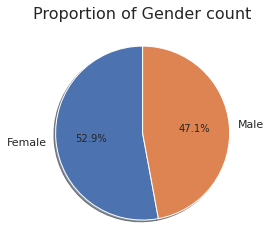

In [14]:
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()

### Proportion of existing and attrited customers count

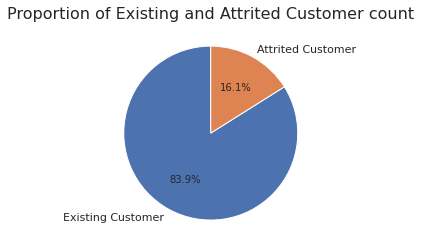

In [10]:
plt.pie(df['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

### Proportion of existing and attrited customer by gender

Text(0.5, 1.0, 'Existing Customer vs Gender')

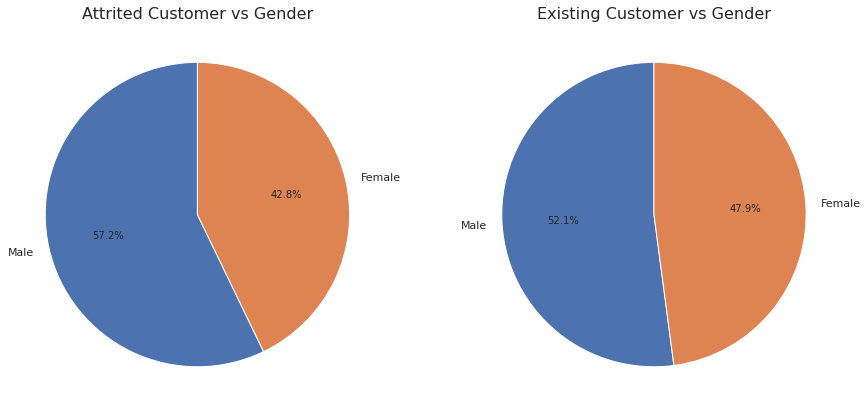

In [16]:
# visualize to see the proportion of existing and attrited customers by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_gender = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
ax1.pie(x=attrited_gender, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Gender', fontsize=16)

existing_gender=df.loc[df["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
ax2.pie(x=existing_gender,labels=["Male","Female"],autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Gender', fontsize=16)

### Proportion of entire education levels

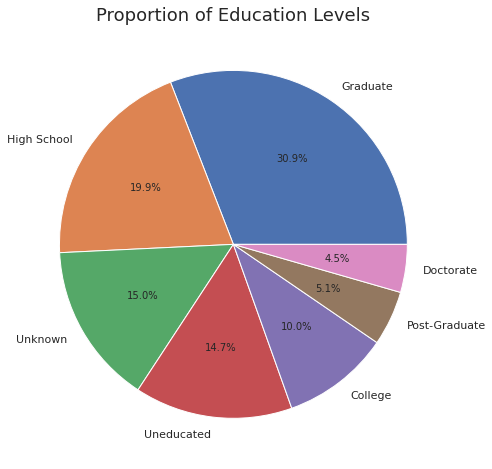

In [17]:
edu = df['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Proportion of Education Levels', fontsize = 18)
plt.show()

### Proportion of education level by existing and attrited customer

Text(0.5, 1.0, 'Existing Customer vs Education Level')

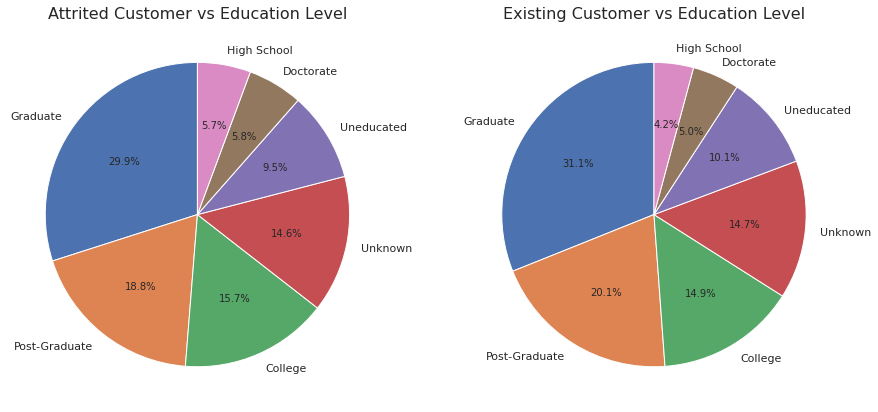

In [18]:
# Proportion of education level by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_edu = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Education Level', fontsize=16)

existing_edu = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Education Level', fontsize=16)

### Proportion of education level by gender

Text(0.5, 1.0, 'Male vs Education Level')

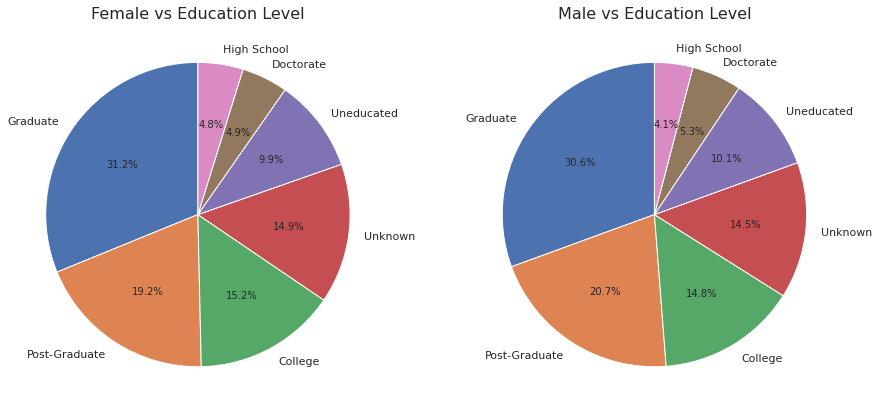

In [19]:
# By pieplot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_eduprop = df.loc[df["Gender"] == "F", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Female vs Education Level', fontsize=16)

existing_eduprop = df.loc[df["Gender"] == "M", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Male vs Education Level', fontsize=16)

### Proportion of marital status by attrited and existing customers

Text(0.5, 1.0, 'Existing Customer vs Marital_Status')

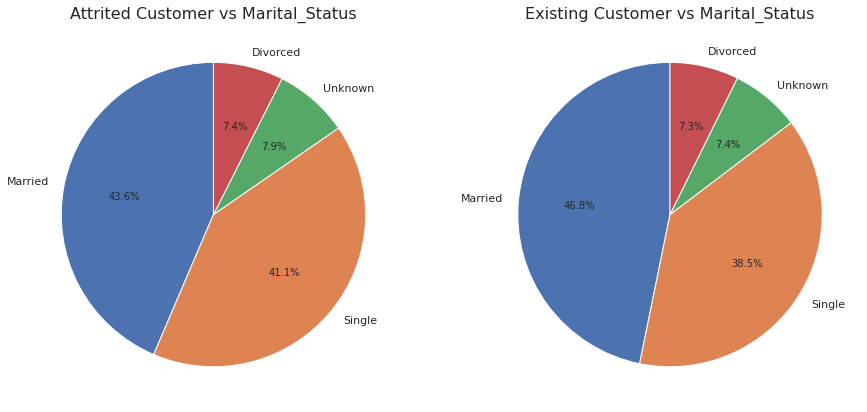

In [20]:
# Proportion of marital status by customer

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_mar = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts().tolist()
ax1.pie(x=attrited_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Marital_Status', fontsize=16)

existing_mar = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Marital_Status"]].value_counts().tolist()
ax2.pie(x=existing_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Marital_Status', fontsize=16)

### Proportion of income category by customer

Text(0.5, 1.0, 'Existing Customer vs Income_Category')

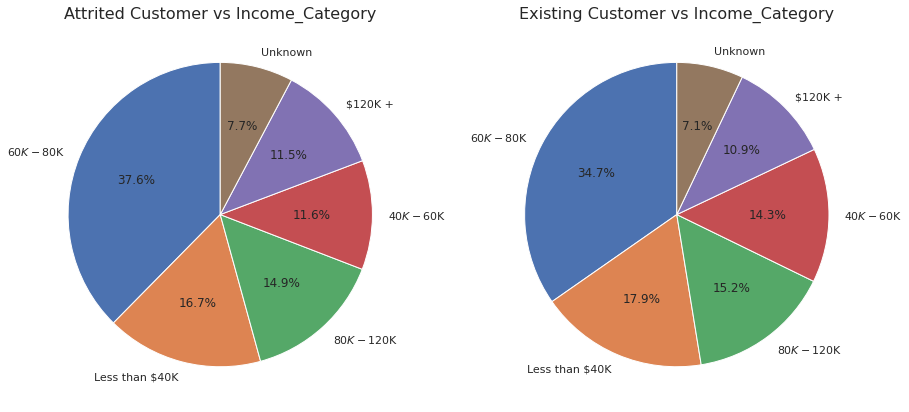

In [26]:
# Proportion of income category by customer
# Proportion of income category by customer

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
count = Counter(df['Income_Category'])

attrited_inc = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Income_Category"]].value_counts().tolist()
ax1.pie(x=attrited_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Income_Category', fontsize=16)

existing_inc = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Income_Category"]].value_counts().tolist()
ax2.pie(x=existing_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Income_Category', fontsize=16)